### This notebook generates the figure that summarizes task-related activity using mean-correlation-with-single-trials (mr2 == mean-rsquared) for task-classification ----> see task_class_assignment.ipynb

#### This must be run individually for each dataset.

In [119]:
### Load imports.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib
import numpy as np
import time
import scipy.stats
import pickle

from collections import defaultdict

import h5py
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import zscore

import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces
import cosmos.traces.clustering_utils as cu
import cosmos.params.trace_analyze_params as params 

matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 # truetype
matplotlib.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [45]:
### Set up filepaths.
workstation = 'cosmosdata' #'analysis2'

if workstation == 'analysis2':
    base_dir = '/home/izkula/Dropbox/'
elif workstation == 'cosmosdata':
    base_dir = '/home/user/Dropbox'
    
data_dir = base_dir + '/cosmos_data/'
general_plots_save_dir = base_dir + '/cosmos/trace_analysis/'
fig_save_dir = base_dir + '/cosmos/fig_plots/fig3/'
bpod_dir = base_dir + '/cosmos_data/behavior/'
clustering_dir = base_dir + '/cosmos_data/clustering_results/'
cluster_figs_dir = base_dir + '/cosmos/fig_plots/fig3/'

    
# if not os.path.isdir(fig_save_dir):
os.makedirs(fig_save_dir, exist_ok=True)

In [46]:
# Which datasets to include
# datasets = [7, 19, 18, 11, 22, 23, 24, 25] #[18, 19] #[7, 11, 18, 19]
# datasets = [16] #[16] #[35] #[7, 11, 18, 19] #[18, 19] #[7, 11, 18, 19]

# datasets = [7, 19, 18, 11, 22, 23, 24, 25] ### Use this to compare multiple days
datasets = [7, 19, 18, 11] ### Use this if you just want to look at basic datasets.

datasets = [7, 11, 18, 19, 35]

mouse_colors = utils.get_colors(4, plt.cm.spectral);


In [47]:
%pdb

Automatic pdb calling has been turned ON


In [48]:
fig_save_dir

'/home/user/Dropbox/cosmos/fig_plots/fig3/'

20180401 cux2ai148m72_COSMOSTrainMultiBlockGNG_1
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing that ntrials is:211
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_pre-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_post-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/licks.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/success_rate.pdf
LED trials: 212
Processing traces.
[-34.99899927 423.99899927]
[297.73913811 301.26086189]
Elapsed time: 19.662326335906982
20180420 cux2ai148m943_COSMOSTrainMultiBlockGNG_1
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing t

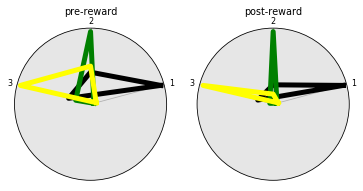

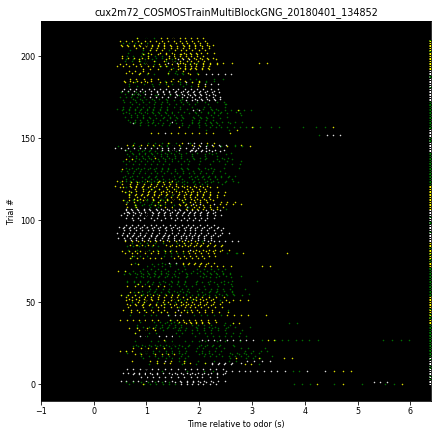

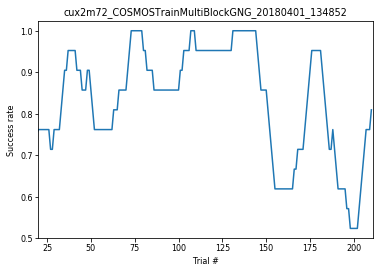

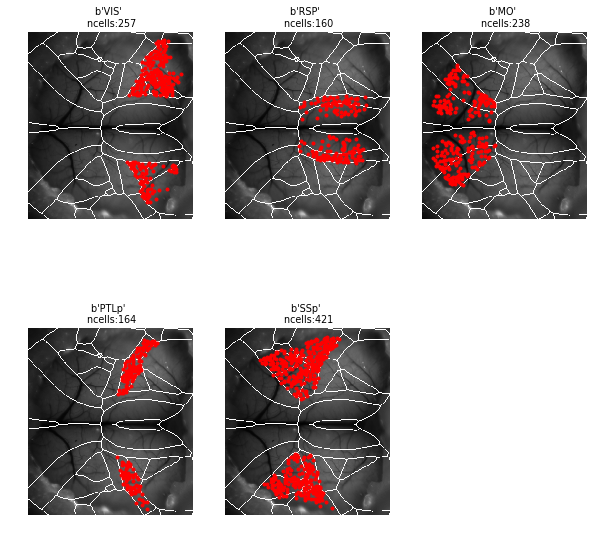

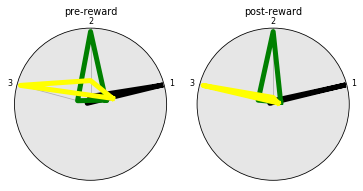

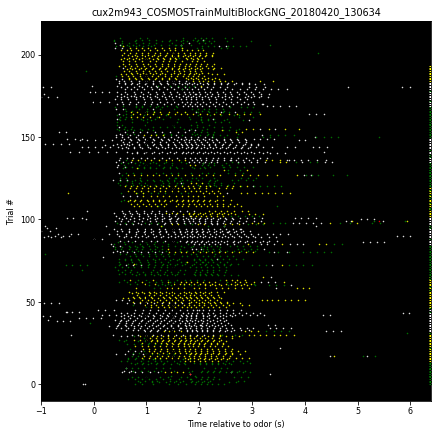

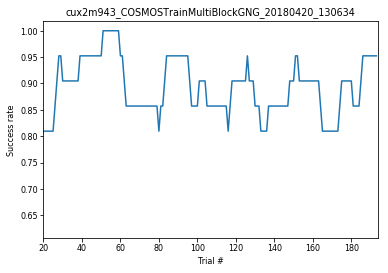

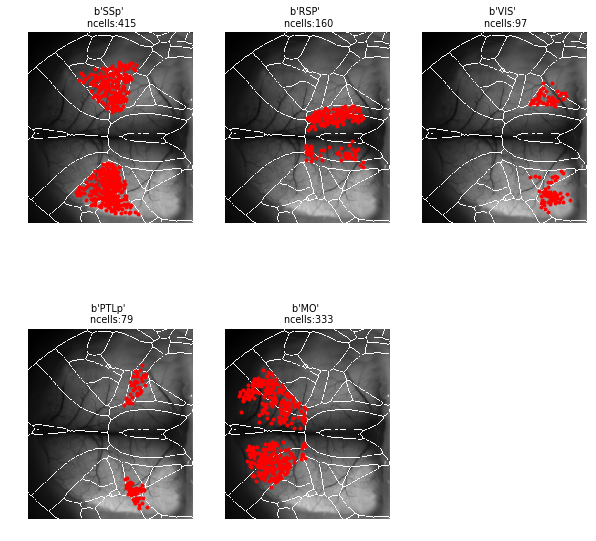

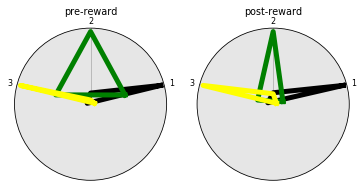

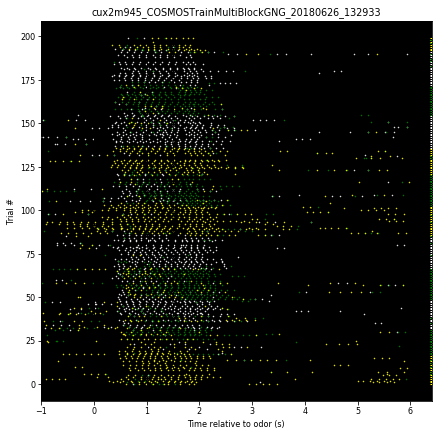

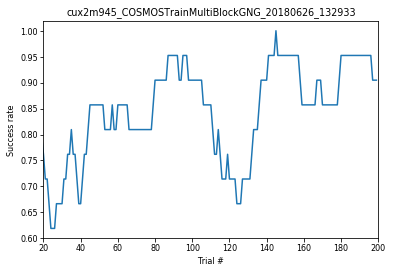

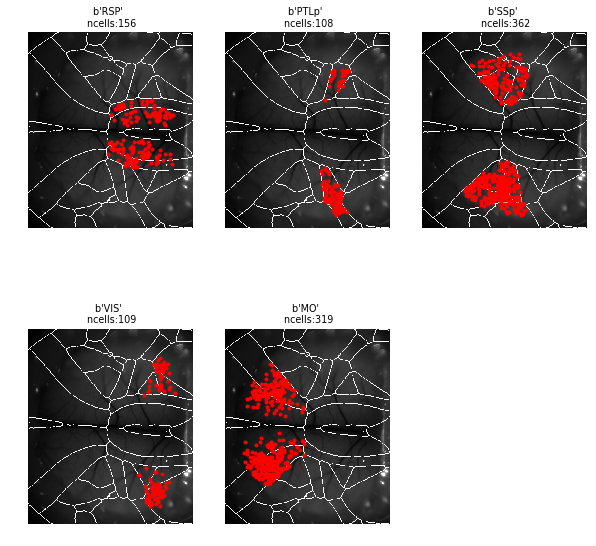

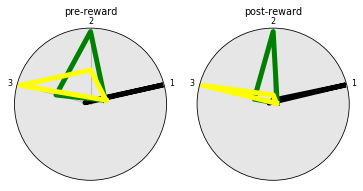

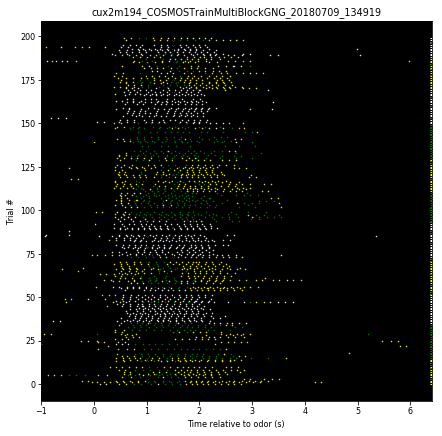

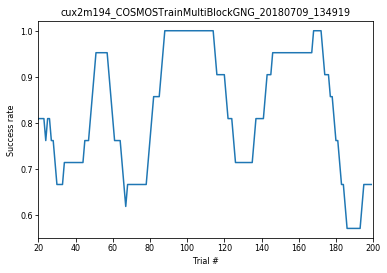

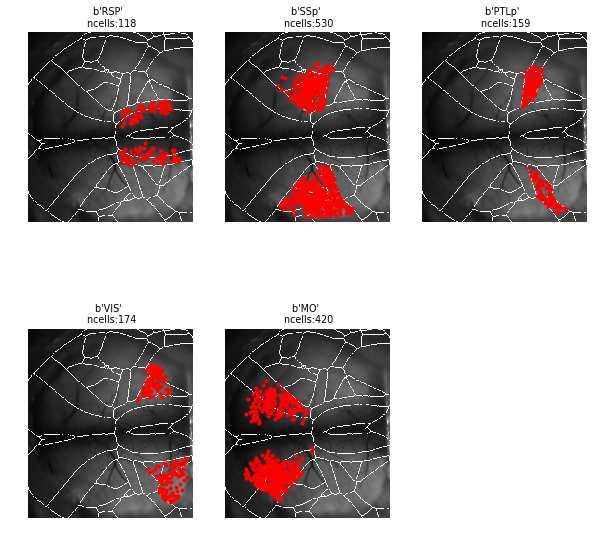

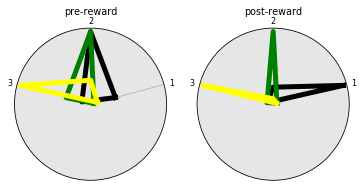

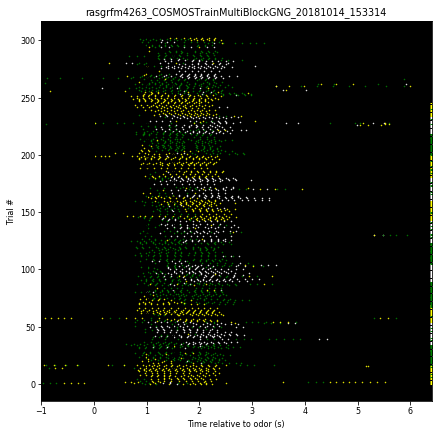

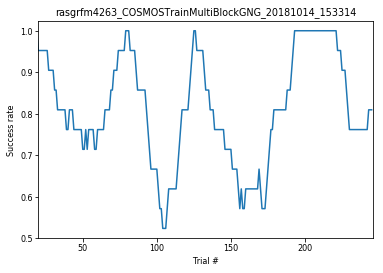

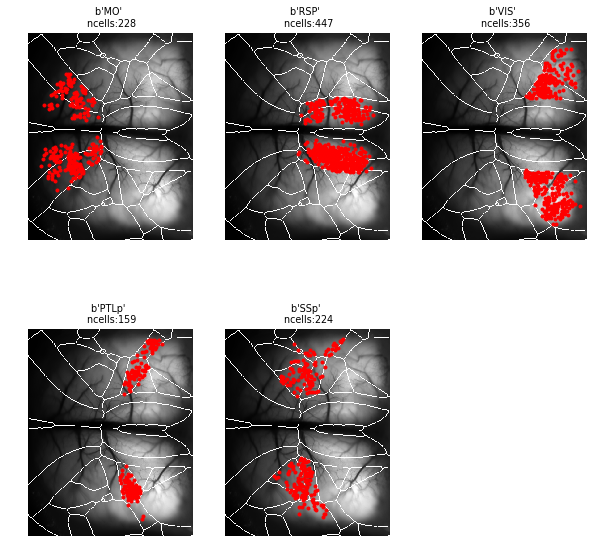

In [49]:
# Load all of the datasets (each their own class).
allCT = []
for dataset_id in datasets:
    dataset = params.DATASETS[dataset_id]
    print(dataset['date'], dataset['name'])
    dataset['data_root'] = data_dir
    dataset['fig_save_dir'] = general_plots_save_dir
    dataset['behavior_dir'] = bpod_dir
    
    startt = time.time()
    CT = CosmosTraces(dataset, do_region_plots=True)
    allCT.append(CT)
    print('Elapsed time: '+str(time.time() - startt))

### Begin --- plot task clusters for an individual dataset

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt7_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/7
Done computing rates.
0
701
/home/user/Dropbox/cosmos/fig_plots/fig3/7


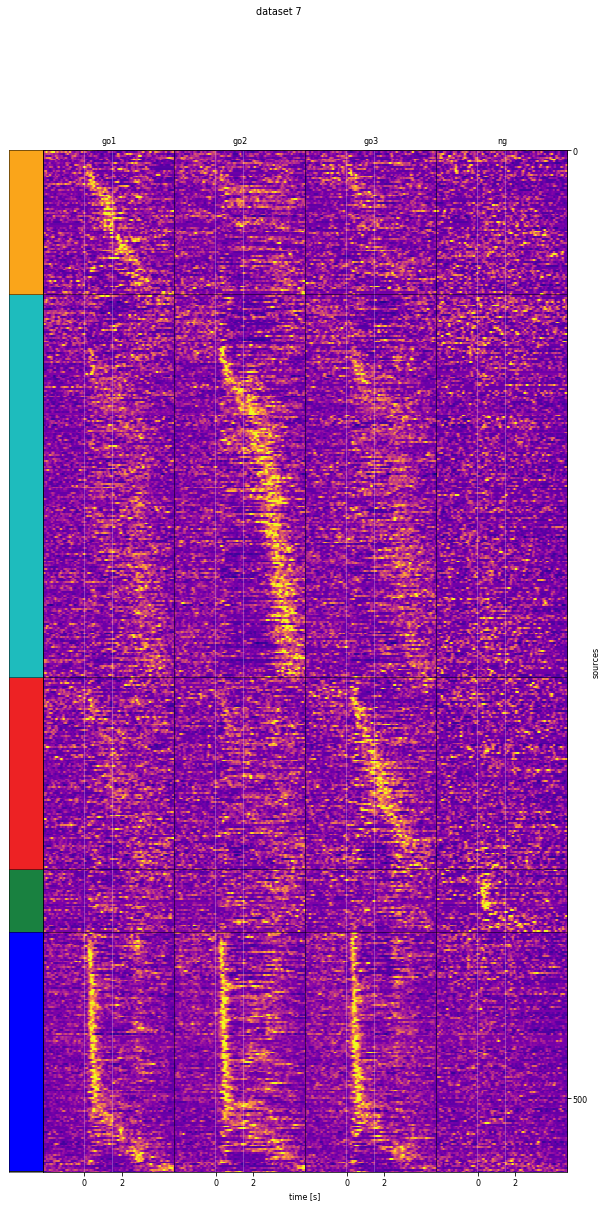

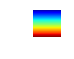

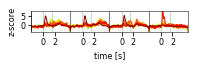

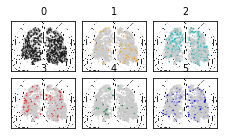

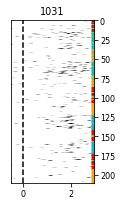

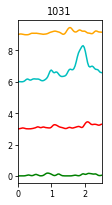

In [129]:
dataset_id = 7 ### YOU NEED TO RUN THIS FOR ALL OF THE DATASETS. SHOULD REFACTOR....
CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])

cu.plot_task_classification_for_one_dataset(dataset_id, CT_ind, allCT, sets, clustering_dir, cluster_figs_dir)

In [104]:
# 0) Load the clustered data.
dataset_id = 7 ### YOU NEED TO RUN THIS FOR ALL OF THE DATASETS. SHOULD REFACTOR....
CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])

n_components = 40
sets = [#{'method':'nmf', 'protocol':'4way', 'randseed':1, 'n_components':n_components, 'l1':0.0},
        {'method':'nmf', 'protocol':'full', 'randseed':1, 'n_components':n_components, 'l1':0.0},
        {'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''},
    ]
all_nmf = cu.load_clustering_results(dataset_id, sets, clustering_dir, protocol_as_key=True)
    
# clust_fig_dir = os.path.join(cluster_figs_dir, 'avg_plots_{}'.format(n_components), str(dataset_id))
clust_fig_dir = os.path.join(cluster_figs_dir, str(dataset_id))

os.makedirs(clust_fig_dir, exist_ok=True)
print('Save to:')
print(clust_fig_dir)

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt7_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/7


In [105]:
### Load clustered data.
protocol = 'mr2' # '4way'

### The below requires having loaded the CT datastructure.
fps = CT.fps
if protocol == '4way':
    rates = gaussian_filter1d(allCT[CT_ind].St, 1.5, axis=1, mode='constant')
    event_frames = allCT[CT_ind].event_frames
    data = cu.concatenate_trial_type_avgs(all_nmf['4way']['trial_sets'], rates, 
                                          do_plot=False)
elif protocol == '2way':
    rates = gaussian_filter1d(allCT[CT_ind].St, 1.5, axis=1, mode='constant')
    do_super_clust = True
    if not do_load:
        data = cu.concatenate_trial_type_avgs(all_nmf['2way']['trial_sets'], rates, 
                                              do_plot=True)
elif protocol == 'oeg2way':
    pass

elif protocol == 'full':
    rates = gaussian_filter1d(allCT[CT_ind].St, 1.5, axis=1, mode='constant')
    rates_flat = np.reshape(rates, (rates.shape[0], rates.shape[1]*rates.shape[2]), order='F')
    data = rates_flat
    do_super_clust = False
    
elif protocol == 'glm':
    rates = gaussian_filter1d(allCT[CT_ind].St, 1.5, axis=1, mode='constant')
    event_frames = allCT[CT_ind].event_frames
    data = cu.concatenate_trial_type_avgs(all_nmf['glm']['trial_sets'], rates, 
                                          do_plot=False)
    
elif protocol == 'mr2':
    rates = gaussian_filter1d(allCT[CT_ind].St, 1.5, axis=1, mode='constant')
    event_frames = allCT[CT_ind].event_frames
    data = cu.concatenate_trial_type_avgs(all_nmf['mr2']['trial_sets'], rates, 
                                          do_plot=False)
    data_front = cu.concatenate_trial_type_avgs(all_nmf['mr2']['trial_sets'], rates, 
                                                do_plot=False, get_first_half=True)
    data_back = cu.concatenate_trial_type_avgs(all_nmf['mr2']['trial_sets'], rates, 
                                                do_plot=False, get_second_half=True)


print('Done computing rates.')

Done computing rates.


In [106]:
if 'mr2' in all_nmf.keys():
    tm = utils.get_task_modulated(rates, all_nmf['mr2']['trial_sets']);

In [110]:
### Plot sources that are selective between odor onset and lick onset
do_plot_pre_lick_cells = False

if do_plot_pre_lick_cells:
    task_classes = all_nmf['mr2']['ordered_super_clustering']
    trial_sets = all_nmf['mr2']['trial_sets']


    pre_lick_dir = os.path.join(cluster_figs_dir, 
                                 'pre_lick_sources', str(dataset_id))
    os.makedirs(pre_lick_dir, exist_ok=True)

    odor_onset = 65

    earliest_frame = odor_onset
    latest_frame = 74
    which_classes = [1, 2, 3]
    which_sets = [0, 1, 2]
    lick_rates = allCT[CT_ind].bd.spout_lick_rates
    spike_rates = allCT[CT_ind].St
    cu.plot_pre_lick_sources(lick_rates, spike_rates,
                          task_classes, trial_sets, 
                          which_classes, which_sets,
                          earliest_frame, latest_frame,
                          fps, save_dir=pre_lick_dir)



0
701
/home/user/Dropbox/cosmos/fig_plots/fig3/7


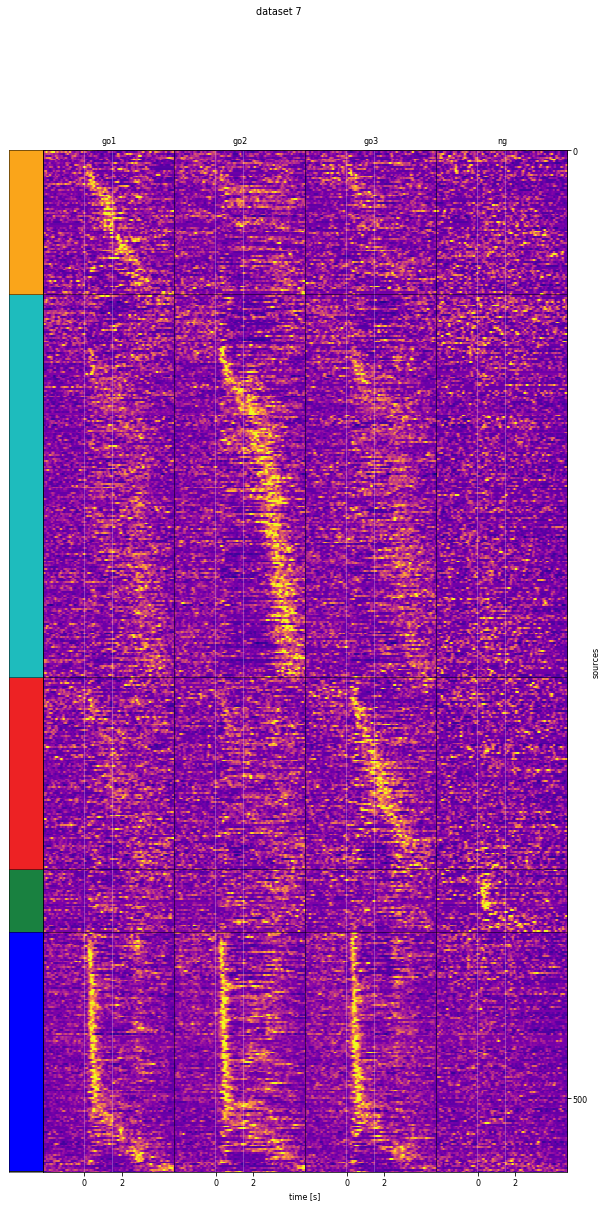

In [111]:
### Generate the super-clustering ordered average trace figure.
if 'mr2' in all_nmf.keys():
    source_coloring = cu.assign_colors_to_sources(all_nmf['mr2']['ordered_clustering'], 
                                                  all_nmf['mr2']['ordered_super_clustering'],
                                                  cmap='jet',
                                                  same_within_super_cluster=True,
                                                  specify_discrete_colors=True)

    trial_set_inds = all_nmf['mr2']['trial_set_inds']
    trial_names = all_nmf['mr2']['trial_names']
    label_positions = trial_set_inds + np.diff(trial_set_inds)[0]/2 ## To label each trial type.
    cm = 'plasma'
    cu.plot_clustered_sources(all_nmf['mr2']['ordered_clustering'], 
                              all_nmf['mr2']['ordered_super_clustering'], 
                              source_means=data_back,  ### Set to data_back for cross-validated plotting. data_front to use the same as ordering. 
                              source_coloring=source_coloring,
                              cmap=cm, 
                              clim=[-2, 4],
                              vertical_lines={'k':trial_set_inds, 
                                              'w': np.hstack((trial_set_inds+64, 
                                                              trial_set_inds+108))
                                             }, 
                              title_str='dataset {}'.format(dataset_id),
                              labels={'labels':trial_names, 
                                      'positions':label_positions},
                              time_labels={'labels':['0']*len(trial_names) + 
                                                    ['2']*len(trial_names),
                                           'positions': np.hstack(
                                               (trial_set_inds+event_frames[1],
                                                trial_set_inds+event_frames[1]+2*fps))},
                              exclude_super_clusters=[0],
                             )

    savename = 'id'+str(dataset_id)+'_'+protocol+'_traces_'+cm
    if not os.path.isdir(clust_fig_dir):
        os.makedirs(clust_fig_dir)
    print(clust_fig_dir)
#     plt.gcf().set_size_inches(w=2.5, h=4) # Control size of figure in inches
    plt.savefig(os.path.join(clust_fig_dir, savename+'.pdf'), 
                transparent=True, rasterized=True, dpi=600) 
    plt.savefig(os.path.join(clust_fig_dir, savename+'.png'), 
                transparent=True, rasterized=True, dpi=50) 
else:
    print('Not plotting super-clusters.')

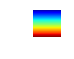

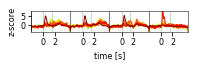

In [112]:
### Now plot the average traces of each super cluster.
if 'mr2' in all_nmf.keys():
    cu.plot_cluster_averages(data, 
                             all_nmf['mr2']['ordered_clustering'], 
                             all_nmf['mr2']['ordered_super_clustering'], 
                             trial_set_inds, by_trial_type=True,
                             event_frames=[event_frames[1],
                                           event_frames[1]+2*fps],
                             event_labels=[0, 2],
                             time_labels={'labels':['0']*len(trial_names) + ['2']*len(trial_names),
                                           'positions': np.hstack((trial_set_inds+event_frames[1],
                                                                  trial_set_inds+event_frames[1]+2*fps))},
                             vertical_lines={'k':trial_set_inds, 
                                             'g': np.hstack((trial_set_inds+64, 
                                                              trial_set_inds+108))
                                             },
                            )
    
    savename = 'id'+str(dataset_id)+'_'+protocol+'_cluster_averages.pdf'
    plt.gcf().set_size_inches(w=2.819, h=0.4) # Control size of figure in inches
    plt.savefig(os.path.join(clust_fig_dir, savename), 
                transparent=True, rasterized=True, dpi=600) 

In [113]:
### You can try only include the trial-modulated sources. 
do_include_only_task_modulated = False
if do_include_only_task_modulated:
    source_coloring[~tm, :] = np.array([0.8, 0.8, 0.8, 0.8])

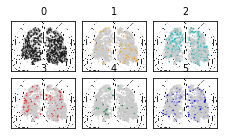

In [115]:
### For each super cluster, plot the location of the included cells, over grey background dots,
### with the corresponding color from the above plot. 
if 'mr2' in all_nmf.keys():
    subplot_titles = None
#     subplot_titles= all_nmf['4way']['super_clust_info']['titles']
    cu.plot_cluster_spatial_maps(source_coloring,
                                 all_nmf['mr2']['ordered_super_clustering'],
                                 all_nmf['mr2']['centroid_atlas_coords'],
                                 radius=3, #0.5, 
                                 do_overlay=False,
                                 background_color=np.array([0.8, 0.8, 0.8, 0.8]),
                                 subplot_titles= subplot_titles,
                                 specific_clusters=None)

    savename = 'id'+str(dataset_id)+'_'+protocol+'_spatial_maps.pdf'
    if subplot_titles is None:
        plt.gcf().set_size_inches(w=3.7, h=2) # Control size of figure in inches
    else:
        plt.gcf().set_size_inches(w=2.5, h=2) # Control size of figure in inches

    plt.savefig(os.path.join(clust_fig_dir, savename), 
                transparent=True, rasterized=True, dpi=600) 

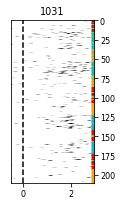

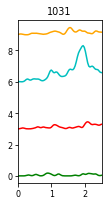

In [116]:
### Plot single trials for the schematic, with the trial type on the right side, and also the mean traces
# plt.figure(figsize=(15, 15))
if dataset_id == 7:
    source_id = 1031
#     source_id = 5
else: 
    source_id = 0 # until further notice...
    
trial_types = np.copy(allCT[CT_ind].bd.spout_positions)
trial_types[np.where(allCT[CT_ind].bd.trial_types==4)[0]] = 0

event_frame = allCT[CT_ind].event_frames[1]
cu.plot_single_trials_with_trial_type(source_id, rates, trial_types,
                                     start_f=50, end_f=150, 
                                      event_frame=event_frame, fps=CT.fps,
                                     cmap='gray_r')

plt.gcf().set_size_inches(w=1.5, h=3) # Control size of figure in inches
savename = 'id'+str(dataset_id)+'_'+protocol+'_single_trial_'+str(source_id)+'.pdf'
plt.savefig(os.path.join(clust_fig_dir, savename), 
            transparent=True, rasterized=True, dpi=600) 

### Now plot mean traces
plt.figure()
cu.plot_trial_type_mean_traces(source_id, rates, trial_types, event_frame, CT.fps)

plt.gcf().set_size_inches(w=1.5, h=3) # Control size of figure in inches
savename = 'id'+str(dataset_id)+'_'+protocol+'_single_trial_means_'+str(source_id)+'.pdf'
plt.savefig(os.path.join(clust_fig_dir, savename), 
            transparent=True, rasterized=True, dpi=600) 


In [117]:
# If you want to explore which sources would be good, can plot with this
do_explore_single_sources = False
if do_explore_single_sources:
    for i in np.where(all_nmf['mr2']['ordered_super_clustering'] == 1)[0]:
        plt.figure()
        plt.imshow(rates[i, :, :].T)
        plt.title(i)

### End --- plot task clusters for an individual dataset

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt19_r_n_l.pkl
[-0.375  0.625  1.625  2.625  3.625]
[0.9803921568627451, 0.6470588235294118, 0.10196078431372549, 1.0]
[0.10800432 0.10253456 0.09089526 0.11336383 0.1222982 ]
[0.01926525 0.03066051 0.02657722 0.01434062 0.01720318]
[-0.225, 0.775, 1.775, 2.775, 3.775]
[0.11764705882352941, 0.7372549019607844, 0.7411764705882353, 1.0]
[0.14197198 0.12189991 0.12444793 0.11447678 0.06447107]
[0.0343446  0.01359703 0.01877215 0.02260207 0.01835739]
[-0.07500000000000001, 0.925, 1.9249999999999998, 2.925, 3.925]
[0.9294117647058824, 0.13333333333333333, 0.1411764705882353, 1.0]
[0.06955764 0.06515329 0.0601077  0.0928081  0.08961819]
[0.00616859 0.009

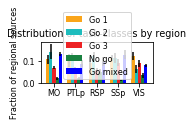

In [64]:
### Plot spatial distribution by region

dsets_spatial = [7, 11, 18, 19]

spatial_sets = [{'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''}]

(all_clusters_region_dist, 
 all_total_cells_per_region) = cu.get_task_clusters_per_region(datasets,
                                                            allCT,
                                                            spatial_sets, 
                                                            dsets_spatial,
                                                            clustering_dir
                                                           )

region_ordering = ['MO', 'PTLp', 'RSP', 'SSp', 'VIS']
(all_spatial_dist, 
 all_total_cells) = cu.organize_clusters_per_region(dsets_spatial,
                                                    all_clusters_region_dist,
                                                    all_total_cells_per_region,
                                                     regions=region_ordering)

do_group_by_region = True

if do_group_by_region:
#     region_colors = [[0, 0, 0, 1.0]] + cu.get_color_template()
    region_colors = cu.get_color_template()

    task_class_names = ['Unassigned', 'Go 1', 'Go 2', 'Go 3', 'No go', 'Go mixed']
    cu.plot_clusters_per_region(all_spatial_dist, all_total_cells, 
                                regions=region_ordering,
                                task_class_names=task_class_names,
                                do_normalize=True, bar_width=0.15, 
                                start_cluster=1, group_colors=region_colors,
                               group_by_region=True)
    
else:
    region_colors = [[.1,.1,.1], [.3,.3,.3], [.5,.5,.5], [.7,.7,.7], [.9,.9,.9]]
    task_class_names = ['Go 1', 'Go 2', 'Go 3', 'No go', 'Go mixed']
    cu.plot_clusters_per_region(all_spatial_dist, all_total_cells, 
                                regions=region_ordering,
                                task_class_names=task_class_names,
                                do_normalize=True, bar_width=0.15, 
                                start_cluster=1, group_colors=region_colors,
                               group_by_region=False)

### Do stats...
plt.gcf().set_size_inches(w=2, h=0.75) # Control size of figure in inches
savename = 'sources_in_region_by_cluster'+'_'+protocol+'_{}'.format(do_group_by_region)+'.pdf'
plt.savefig(os.path.join(cluster_figs_dir, savename), 
            transparent=True, rasterized=True, dpi=600) 

### Begin ---- Plot spatial statistics for all datasets

In [65]:
### Plot spatial statistics

dsets_spatial = [7, 11, 18, 19, 35]

spatial_sets = [{'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''}]

(centroids, labels) = cu.load_centroids_and_task_labels(datasets, 
                                                        allCT,
                                                        spatial_sets,
                                                        dsets_spatial,
                                                        clustering_dir
                                                       )

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt19_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt35_r_n_l.pkl
Converting pixels to mm.


In [66]:
### Make dir for saveout
spatial_stat_dir = os.path.join(clustering_dir, 
                                'spatial_stat_mm')
os.makedirs(spatial_stat_dir, exist_ok=True)

In [67]:
spatial_stat_dir

'/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm'

In [68]:
### Compute pairwise distance histogram for each class

### 10k shuffles: two-sided ---> 5000, 10-way hist bonferonni ---> 500, 
### 5-way task class bonferonni ---> 100 --> p<0.01
### But, you can also just compute the p-value using percentile, and use fdr-bh

do_compute_pairwise_dists = True

if do_compute_pairwise_dists:
    clusts = np.arange(1, 6)
    nshuff=10001
    (all_shuffle_dists,
     all_dists) = cu.generate_all_pairwise_dists(labels, centroids, dsets_spatial, 
                                              clusts, spatial_stat_dir, nshuff=nshuff)

dset: 7, clust: 1, shuff: 0
dset: 7, clust: 1, shuff: 500
dset: 7, clust: 1, shuff: 1000
dset: 7, clust: 1, shuff: 1500
dset: 7, clust: 1, shuff: 2000
dset: 7, clust: 1, shuff: 2500
dset: 7, clust: 1, shuff: 3000
dset: 7, clust: 1, shuff: 3500
dset: 7, clust: 1, shuff: 4000
dset: 7, clust: 1, shuff: 4500
dset: 7, clust: 1, shuff: 5000
dset: 7, clust: 1, shuff: 5500
dset: 7, clust: 1, shuff: 6000
dset: 7, clust: 1, shuff: 6500
dset: 7, clust: 1, shuff: 7000
dset: 7, clust: 1, shuff: 7500
dset: 7, clust: 1, shuff: 8000
dset: 7, clust: 1, shuff: 8500
dset: 7, clust: 1, shuff: 9000
dset: 7, clust: 1, shuff: 9500
dset: 7, clust: 1, shuff: 10000
0.9984331130981445
1.3497133255004883
dset: 7, clust: 2, shuff: 0
dset: 7, clust: 2, shuff: 500
dset: 7, clust: 2, shuff: 1000
dset: 7, clust: 2, shuff: 1500
dset: 7, clust: 2, shuff: 2000
dset: 7, clust: 2, shuff: 2500
dset: 7, clust: 2, shuff: 3000
dset: 7, clust: 2, shuff: 3500
dset: 7, clust: 2, shuff: 4000
dset: 7, clust: 2, shuff: 4500
dset: 7,

dset: 18, clust: 2, shuff: 9000
dset: 18, clust: 2, shuff: 9500
dset: 18, clust: 2, shuff: 10000
0.9811334609985352
2.9908642768859863
dset: 18, clust: 3, shuff: 0
dset: 18, clust: 3, shuff: 500
dset: 18, clust: 3, shuff: 1000
dset: 18, clust: 3, shuff: 1500
dset: 18, clust: 3, shuff: 2000
dset: 18, clust: 3, shuff: 2500
dset: 18, clust: 3, shuff: 3000
dset: 18, clust: 3, shuff: 3500
dset: 18, clust: 3, shuff: 4000
dset: 18, clust: 3, shuff: 4500
dset: 18, clust: 3, shuff: 5000
dset: 18, clust: 3, shuff: 5500
dset: 18, clust: 3, shuff: 6000
dset: 18, clust: 3, shuff: 6500
dset: 18, clust: 3, shuff: 7000
dset: 18, clust: 3, shuff: 7500
dset: 18, clust: 3, shuff: 8000
dset: 18, clust: 3, shuff: 8500
dset: 18, clust: 3, shuff: 9000
dset: 18, clust: 3, shuff: 9500
dset: 18, clust: 3, shuff: 10000
1.1437830924987793
3.8472366333007812
dset: 18, clust: 4, shuff: 0
dset: 18, clust: 4, shuff: 500
dset: 18, clust: 4, shuff: 1000
dset: 18, clust: 4, shuff: 1500
dset: 18, clust: 4, shuff: 2000
ds

dset: 35, clust: 4, shuff: 5500
dset: 35, clust: 4, shuff: 6000
dset: 35, clust: 4, shuff: 6500
dset: 35, clust: 4, shuff: 7000
dset: 35, clust: 4, shuff: 7500
dset: 35, clust: 4, shuff: 8000
dset: 35, clust: 4, shuff: 8500
dset: 35, clust: 4, shuff: 9000
dset: 35, clust: 4, shuff: 9500
dset: 35, clust: 4, shuff: 10000
0.7810266017913818
0.8384578227996826
dset: 35, clust: 5, shuff: 0
dset: 35, clust: 5, shuff: 500
dset: 35, clust: 5, shuff: 1000
dset: 35, clust: 5, shuff: 1500
dset: 35, clust: 5, shuff: 2000
dset: 35, clust: 5, shuff: 2500
dset: 35, clust: 5, shuff: 3000
dset: 35, clust: 5, shuff: 3500
dset: 35, clust: 5, shuff: 4000
dset: 35, clust: 5, shuff: 4500
dset: 35, clust: 5, shuff: 5000
dset: 35, clust: 5, shuff: 5500
dset: 35, clust: 5, shuff: 6000
dset: 35, clust: 5, shuff: 6500
dset: 35, clust: 5, shuff: 7000
dset: 35, clust: 5, shuff: 7500
dset: 35, clust: 5, shuff: 8000
dset: 35, clust: 5, shuff: 8500
dset: 35, clust: 5, shuff: 9000
dset: 35, clust: 5, shuff: 9500
dset:

In [69]:
do_load_spatial_dists = True

if do_load_spatial_dists:
    nshuff = 10001
    clusts = np.arange(1, 6)
    all_shuffle_dists = dict()
    all_dists = dict()
    for dd in dsets_spatial:
        all_shuffle_dists[dd] = dict()
        all_dists[dd] = dict()
        for clust in clusts:
            fname = os.path.join(spatial_stat_dir, '{}_clust_{}_pairwise_dists_nshuff_{}.npz'.format(dd, clust, nshuff))
            print(fname)
            with open(fname, 'rb') as ff:
                out = np.load(ff)
                all_shuffle_dists[dd][clust] = out['shuffle_dists']
                all_dists[dd][clust] = out['dists']

/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_1_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_2_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_3_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_4_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_5_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_1_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_2_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_3_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_4_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmo

In [70]:
### Get empirical CDFs and associated corrected p-values (takes a little bit of time).
empirical_dsets = [7, 11, 18, 19, 35]
bins = np.linspace(0, 7, 100)
(all_shuffle_cdf, all_cdf) = cu.get_cdfs(all_dists, 
                                         all_shuffle_dists, 
                                         bins, empirical_dsets)
all_pvals = cu.get_empirical_pvalues(all_shuffle_cdf, all_cdf, 
                                     empirical_dsets)
all_corrected_pvals = cu.get_corrected_pvals(all_pvals)

22.614655017852783
17.67320466041565
16.972103118896484
27.506081104278564
25.401257753372192


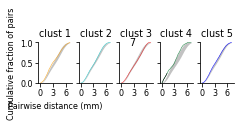

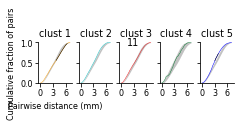

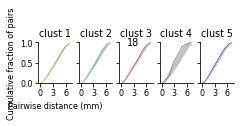

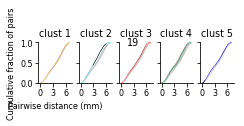

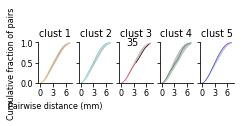

In [71]:
### Plot CDFs (fast once the cdf's have already been computed).
coloring = cu.get_color_template()[1:]
cu.overlay_spatial_cdfs_on_null_dist(all_shuffle_cdf, 
                                    all_cdf,
                                    bins, 
                                    all_corrected_pvals, 
                                    empirical_dsets,
                                    np.arange(1, 6),
                                    savepath=cluster_figs_dir,
                                    colors=coloring,
                                    shuff_shade_p=0.05
                                    )

In [72]:
### Get empirical histograms and associated corrected p-values (takes a little bit of time).

do_get_histograms = False

if do_get_histograms:
    bins = np.arange(0, 7, 0.5)
    (all_shuffle_hist,
     all_hist) = cu.generate_hists_from_dists(all_shuffle_dists,
                                           all_dists,
                                           empirical_dsets,
                                           np.arange(1, 6),
                                           bins)
    hist_pvals = cu.get_empirical_pvalues(all_shuffle_hist,
                                       all_hist,
                                       empirical_dsets)
    hist_corrected_pvals = cu.get_corrected_pvals(hist_pvals)

In [73]:
### Plot histograms (fast once the hists have already been computed).
if do_get_histograms:
    coloring = cu.get_color_template()[1:]
    cu.overlay_spatial_hists_on_null_dist(all_shuffle_hist,
                                       all_hist,
                                       bins[:-1],
                                       hist_corrected_pvals,
                                       empirical_dsets,
                                       np.arange(1, 6),
                                       savepath=cluster_figs_dir,
                                       colors=coloring,
                                       shuff_shade_p=0.05)

### Now simulate some data to see what sort of sensitivity you should have...

dset: 130, clust: 1, shuff: 0
dset: 130, clust: 1, shuff: 500
dset: 130, clust: 1, shuff: 1000
dset: 130, clust: 1, shuff: 1500
dset: 130, clust: 1, shuff: 2000
dset: 130, clust: 1, shuff: 2500
dset: 130, clust: 1, shuff: 3000
dset: 130, clust: 1, shuff: 3500
dset: 130, clust: 1, shuff: 4000
dset: 130, clust: 1, shuff: 4500
dset: 130, clust: 1, shuff: 5000
dset: 130, clust: 1, shuff: 5500
dset: 130, clust: 1, shuff: 6000
dset: 130, clust: 1, shuff: 6500
dset: 130, clust: 1, shuff: 7000
dset: 130, clust: 1, shuff: 7500
dset: 130, clust: 1, shuff: 8000
dset: 130, clust: 1, shuff: 8500
dset: 130, clust: 1, shuff: 9000
dset: 130, clust: 1, shuff: 9500
dset: 130, clust: 1, shuff: 10000
0.7902565002441406
0.8625972270965576
dset: 130, clust: 2, shuff: 0
dset: 130, clust: 2, shuff: 500
dset: 130, clust: 2, shuff: 1000
dset: 130, clust: 2, shuff: 1500
dset: 130, clust: 2, shuff: 2000
dset: 130, clust: 2, shuff: 2500
dset: 130, clust: 2, shuff: 3000
dset: 130, clust: 2, shuff: 3500
dset: 130, c

dset: 132, clust: 2, shuff: 5000
dset: 132, clust: 2, shuff: 5500
dset: 132, clust: 2, shuff: 6000
dset: 132, clust: 2, shuff: 6500
dset: 132, clust: 2, shuff: 7000
dset: 132, clust: 2, shuff: 7500
dset: 132, clust: 2, shuff: 8000
dset: 132, clust: 2, shuff: 8500
dset: 132, clust: 2, shuff: 9000
dset: 132, clust: 2, shuff: 9500
dset: 132, clust: 2, shuff: 10000
0.6410050392150879
0.6437313556671143
dset: 132, clust: 3, shuff: 0
dset: 132, clust: 3, shuff: 500
dset: 132, clust: 3, shuff: 1000
dset: 132, clust: 3, shuff: 1500
dset: 132, clust: 3, shuff: 2000
dset: 132, clust: 3, shuff: 2500
dset: 132, clust: 3, shuff: 3000
dset: 132, clust: 3, shuff: 3500
dset: 132, clust: 3, shuff: 4000
dset: 132, clust: 3, shuff: 4500
dset: 132, clust: 3, shuff: 5000
dset: 132, clust: 3, shuff: 5500
dset: 132, clust: 3, shuff: 6000
dset: 132, clust: 3, shuff: 6500
dset: 132, clust: 3, shuff: 7000
dset: 132, clust: 3, shuff: 7500
dset: 132, clust: 3, shuff: 8000
dset: 132, clust: 3, shuff: 8500
dset: 13

dset: 134, clust: 3, shuff: 10000
0.6612334251403809
0.6621203422546387
dset: 134, clust: 4, shuff: 0
dset: 134, clust: 4, shuff: 500
dset: 134, clust: 4, shuff: 1000
dset: 134, clust: 4, shuff: 1500
dset: 134, clust: 4, shuff: 2000
dset: 134, clust: 4, shuff: 2500
dset: 134, clust: 4, shuff: 3000
dset: 134, clust: 4, shuff: 3500
dset: 134, clust: 4, shuff: 4000
dset: 134, clust: 4, shuff: 4500
dset: 134, clust: 4, shuff: 5000
dset: 134, clust: 4, shuff: 5500
dset: 134, clust: 4, shuff: 6000
dset: 134, clust: 4, shuff: 6500
dset: 134, clust: 4, shuff: 7000
dset: 134, clust: 4, shuff: 7500
dset: 134, clust: 4, shuff: 8000
dset: 134, clust: 4, shuff: 8500
dset: 134, clust: 4, shuff: 9000
dset: 134, clust: 4, shuff: 9500
dset: 134, clust: 4, shuff: 10000
0.6484341621398926
0.649503231048584
dset: 134, clust: 5, shuff: 0
dset: 134, clust: 5, shuff: 500
dset: 134, clust: 5, shuff: 1000
dset: 134, clust: 5, shuff: 1500
dset: 134, clust: 5, shuff: 2000
dset: 134, clust: 5, shuff: 2500
dset: 1

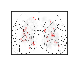

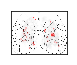

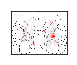

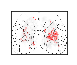

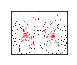

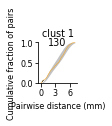

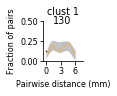

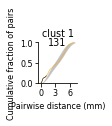

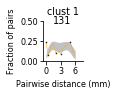

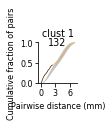

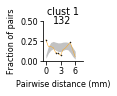

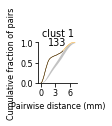

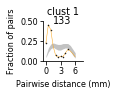

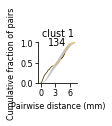

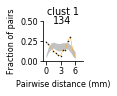

In [74]:
### Simulate clusters and plot spatial analyses.

savedir = os.path.join(cluster_figs_dir, 'simulated')

which_fake_dsets = [130, 131, 132, 133, 134]
# which_fake_dsets = [134]
template_dataset_id = 7

do_generate_fake_data = True
if do_generate_fake_data:
    template_CT = allCT[int(np.where(np.array(datasets)==template_dataset_id)[0])]
    template_labels = labels[template_dataset_id]
    template_centroids = centroids[template_dataset_id]
    (all_fake_labels,
     all_fake_centroids) = cu.get_all_fake_labels_and_centroids(which_fake_dsets,
                                                                template_labels,
                                                                template_centroids,
                                                                template_CT,
                                                                savedir=savedir)
do_compute_pairwise_dists = True
if do_compute_pairwise_dists:
    for fake_dset in all_fake_labels.keys():
        (all_shuffle_dists,
         all_dists) = cu.generate_all_pairwise_dists(all_fake_labels, 
                                                     all_fake_centroids, 
                                                     [fake_dset], 
                                                     clusts=[1], 
                                                     spatial_stat_dir=spatial_stat_dir, 
                                                     nshuff=10001)
        do_hist = True
        do_cdf = True
        if do_cdf:
            bins = np.linspace(0, 7, 100)
            cu.get_and_plot_empirical_cdfs(all_dists, 
                                           all_shuffle_dists,
                                           bins,
                                           [fake_dset],
                                           [1],
                                           savedir)
        if do_hist:
            ### Generate histograms and associated pvals
            bins = np.arange(0, 7, 0.5)
            cu.get_and_plot_empirical_hists(all_dists,
                                            all_shuffle_dists,
                                            bins,
                                            [fake_dset],
                                            [1],
                                            savedir)

### End ---- Plot spatial statistics for all datasets

In [ ]:
raise('Done')

# See fig_cluster_summary_SINGLE_TRIAL for clustering stuff. 